In [ ]:
import csv

# Define the path to the CSV file
csv_file = '/content/dataset.csv'

# Initialize an empty dictionary to store the count of each song played
song_play_count = {}

# Read data from the CSV file
with open(csv_file, mode='r', newline='', encoding='latin-1') as file:
    reader = csv.DictReader(file)
    for row in reader:
        key = (row['Artist Name'], row['Song Name'])
        if key not in song_play_count:
            song_play_count[key] = 0
        song_play_count[key] += 1

# Sort songs based on the play count to identify top preferences
sorted_songs = sorted(song_play_count.items(), key=lambda x: x[1], reverse=True)

# Print the sorted songs
for entry in sorted_songs:
    print(f"Artist: {entry[0][0]}, Track: {entry[0][1]}, Play Count: {entry[1]}")


Artist: Ankit Tiwari, Track: Sanam Teri Kasam, Play Count: 7
Artist: Shashaa Tirupati, Track: Baarish, Play Count: 6
Artist: Badshah, Track: Players, Play Count: 6
Artist: Vishal Mishra, Track: Janiye (from the Netflix Film "Chor Nikal Ke Bhaga"), Play Count: 5
Artist: Neha Kakkar, Track: Taaron Ke Shehar, Play Count: 4
Artist: Ankit Tiwari, Track: Hum Dum, Play Count: 4
Artist: KK, Track: Kya Mujhe Pyar Hai (From "Woh Lamhe"), Play Count: 4
Artist: Javed Ali, Track: Gale Lag Ja - Version 1, Play Count: 3
Artist: Pritam, Track: Pee Loon, Play Count: 3
Artist: Pritam, Track: Tum Kya Mile (From "Rocky Aur Rani Kii Prem Kahaani"), Play Count: 3
Artist: Pritam, Track: Tere Pyaar Mein, Play Count: 3
Artist: Justin Bieber, Track: Boyfriend, Play Count: 3
Artist: Nilesh Ahuja, Track: Thoda Thoda Pyaar, Play Count: 2
Artist: Yasser Desai, Track: Jeene Bhi De, Play Count: 2
Artist: Darshan Raval, Track: Lo Aayi Barsaat, Play Count: 2
Artist: Ami Mishra, Track: Hasi Ban Gaye, Play Count: 2
Artis

In [ ]:
import csv
import numpy as np

# Define the path to the CSV file
csv_file = '/content/dataset.csv'

# Initialize an empty dictionary to store the count of each song played
song_play_count = {}

# Read data from the CSV file and calculate play counts
with open(csv_file, mode='r', newline='', encoding='latin-1') as file:
    reader = csv.DictReader(file)
    for row in reader:
        key = (row['Artist Name'], row['Song Name'])
        if key not in song_play_count:
            song_play_count[key] = 0
        song_play_count[key] += 1

# Convert play count data to a numpy array (user-item matrix)
songs = list(song_play_count.keys())
play_counts = np.array([song_play_count[song] for song in songs])

# Compute similarity matrix (cosine similarity)
def cosine_similarity(x, y):
    return np.dot(x, y) / (np.linalg.norm(x) * np.linalg.norm(y))

similarity_matrix = np.array([[cosine_similarity(play_counts[i], play_counts[j]) for j in range(len(songs))] for i in range(len(songs))])

# Recommend songs for a target user
target_song_index = 0  # Index of the target song in the user-item matrix
target_song_play_count = play_counts[target_song_index]

# Find similar songs
similar_songs_indices = np.argsort(similarity_matrix[target_song_index])[::-1][1:]  # Exclude the target song itself

# Recommend similar songs
recommended_songs = []
for song_index in similar_songs_indices:
    if play_counts[song_index] > 0 and song_index != target_song_index:
        recommended_songs.append((songs[song_index], play_counts[song_index]))

# Sort recommended songs by play count
recommended_songs.sort(key=lambda x: x[1], reverse=True)

print("Recommended songs based on collaborative filtering:")
for song, play_count in recommended_songs:
    print(f"Song: {song}, Play Count: {play_count}")


Recommended songs based on collaborative filtering:
Song: ('Ankit Tiwari', 'Sanam Teri Kasam'), Play Count: 7
Song: ('Shashaa Tirupati', 'Baarish'), Play Count: 6
Song: ('Badshah', 'Players'), Play Count: 6
Song: ('Vishal Mishra', 'Janiye (from the Netflix Film "Chor Nikal Ke Bhaga")'), Play Count: 5
Song: ('Ankit Tiwari', 'Hum Dum'), Play Count: 4
Song: ('KK', 'Kya Mujhe Pyar Hai (From "Woh Lamhe")'), Play Count: 4
Song: ('Neha Kakkar', 'Taaron Ke Shehar'), Play Count: 4
Song: ('Javed Ali', 'Gale Lag Ja - Version 1'), Play Count: 3
Song: ('Pritam', 'Pee Loon'), Play Count: 3
Song: ('Pritam', 'Tere Pyaar Mein'), Play Count: 3
Song: ('Pritam', 'Tum Kya Mile (From "Rocky Aur Rani Kii Prem Kahaani")'), Play Count: 3
Song: ('Sachet Tandon', 'Humraah (From "Malang - Unleash The Madness")'), Play Count: 2
Song: ('Badshah', 'Kar Gayi Chull'), Play Count: 2
Song: ('Jatin-Lalit', 'Chand Sifarish'), Play Count: 2
Song: ('Atif Aslam', 'Dekhte Dekhte'), Play Count: 2
Song: ('Jubin Nautiyal', 'Lut 

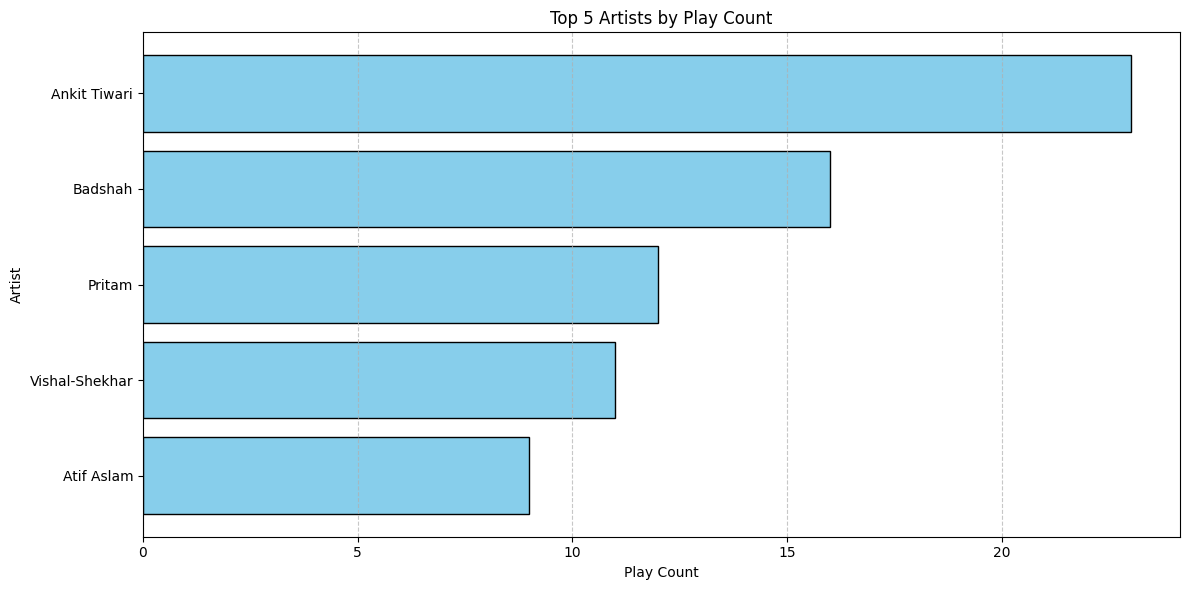

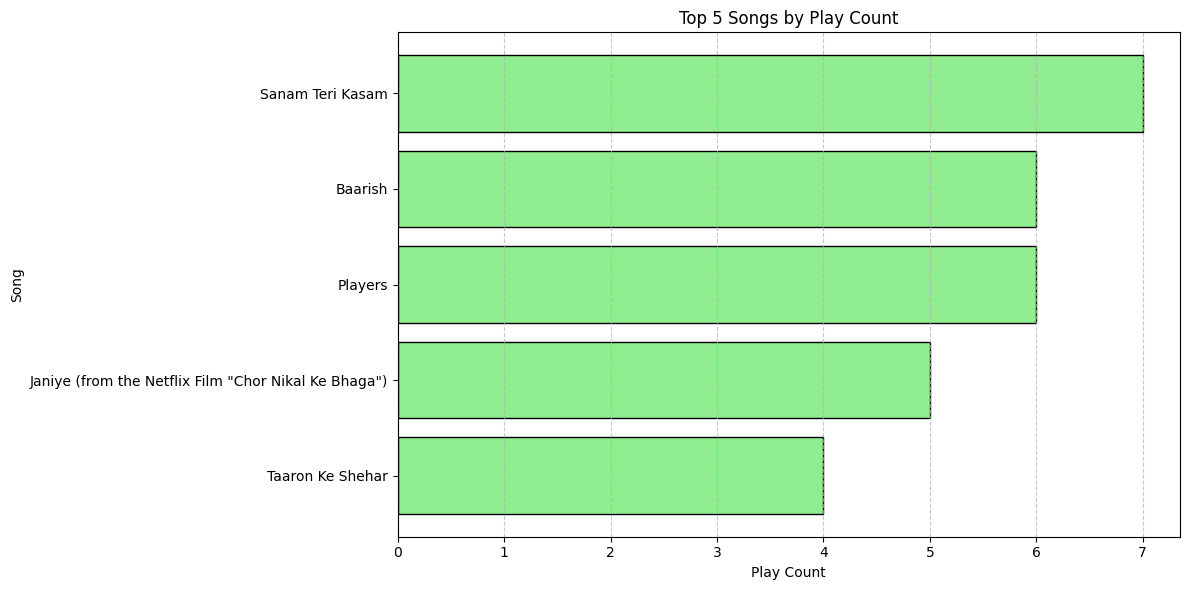

In [ ]:
import csv
import matplotlib.pyplot as plt

# Define the path to the CSV file
csv_file = '/content/dataset.csv'

# Initialize dictionaries to store the count of each artist and song
artist_play_count = {}
song_play_count = {}

# Read data from the CSV file and calculate play counts
with open(csv_file, mode='r', newline='', encoding='latin-1') as file:
    reader = csv.DictReader(file)
    for row in reader:
        artist = row['Artist Name']
        song = row['Song Name']

        # Update artist play count
        if artist not in artist_play_count:
            artist_play_count[artist] = 0
        artist_play_count[artist] += 1

        # Update song play count
        if song not in song_play_count:
            song_play_count[song] = 0
        song_play_count[song] += 1

# Get top 5 artists and their play counts
top_artists = sorted(artist_play_count.items(), key=lambda x: x[1], reverse=True)[:5]
top_artist_names = [artist[0] for artist in top_artists]
top_artist_counts = [artist[1] for artist in top_artists]

# Get top 5 songs and their play counts
top_songs = sorted(song_play_count.items(), key=lambda x: x[1], reverse=True)[:5]
top_song_names = [song[0] for song in top_songs]
top_song_counts = [song[1] for song in top_songs]

# Plot top 5 artists
plt.figure(figsize=(12, 6))
plt.barh(top_artist_names, top_artist_counts, color='skyblue', edgecolor='black')
plt.xlabel('Play Count')
plt.ylabel('Artist')
plt.title('Top 5 Artists by Play Count')
plt.gca().invert_yaxis()  # Invert y-axis to display highest count at the top
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Plot top 5 songs
plt.figure(figsize=(12, 6))
plt.barh(top_song_names, top_song_counts, color='lightgreen', edgecolor='black')
plt.xlabel('Play Count')
plt.ylabel('Song')
plt.title('Top 5 Songs by Play Count')
plt.gca().invert_yaxis()  # Invert y-axis to display highest count at the top
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd

# Read the dataset
df = pd.read_csv('/content/dataset.csv')

# Calculate the play count for each song
song_play_count = df['Song Name'].value_counts()

# Calculate the play count for each artist
artist_play_count = df['Artist Name'].value_counts()

# Find the most played song
most_played_song = song_play_count.idxmax()
most_played_song_count = song_play_count.max()

# Find the most heard artist
most_heard_artist = artist_play_count.idxmax()
most_heard_artist_count = artist_play_count.max()

# Print the results
print(f"The most played song is '{most_played_song}' with {most_played_song_count} plays.")
print(f"The most heard artist is '{most_heard_artist}' with {most_heard_artist_count} plays.")


The most played song is 'Sanam Teri Kasam' with 7 plays.
The most heard artist is 'Ankit Tiwari' with 23 plays.


In [ ]:
import pandas as pd

# Read the datasets
df1 = pd.read_csv('/content/dataset.csv')
df2 = pd.read_csv('/content/278k_labelled_uri.csv')

# Slice the dataframes to include only the first 259 rows
df1_subset = df1.iloc[:260]
df2_subset = df2.iloc[:260]

# Concatenate the dataframes along columns
combined_df = pd.concat([df1_subset, df2_subset], axis=1)

# Display the combined dataframe
combined_df


,Song Name,End Time,Artist Name,Unnamed: 0.1,Unnamed: 0,duration (ms),danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,spec_rate,labels,uri
0,Thoda Thoda Pyaar,25/12/23 18:52,Nilesh Ahuja,0,0,195000.0,0.611,0.614,-8.815,0.0672,0.016900,0.000794,0.7530,0.520,128.050,3.446154e-07,2,spotify:track:3v6sBj3swihU8pXQQHhDZo
1,"Janiye (from the Netflix Film ""Chor Nikal Ke B...",25/12/23 18:52,Vishal Mishra,1,1,194641.0,0.638,0.781,-6.848,0.0285,0.011800,0.009530,0.3490,0.250,122.985,1.464234e-07,1,spotify:track:7KCWmFdw0TzoJbKtqRRzJO
2,Dil Leke,25/12/23 18:57,Shaan,2,2,217573.0,0.560,0.810,-8.029,0.0872,0.007100,0.000008,0.2410,0.247,170.044,4.007850e-07,1,spotify:track:2CY92qejUrhyPUASawNVRr
3,Taal Se Taal - Western Version,25/12/23 18:58,Sukhwinder Singh,3,3,443478.0,0.525,0.699,-4.571,0.0353,0.017800,0.000088,0.0888,0.199,92.011,7.959809e-08,0,spotify:track:11BPfwVbB7vok7KfjBeW4k
4,Tumhe Apna Banane Ka,25/12/23 19:07,Armaan Malik,4,4,225862.0,0.367,0.771,-5.863,0.1060,0.365000,0.000001,0.0965,0.163,115.917,4.693131e-07,1,spotify:track:3yUJKPsjvThlcQWTS9ttYx
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,Boyfriend,02/01/24 10:32,Justin Bieber,255,255,237787.0,0.314,0.838,-3.971,0.0354,0.003270,0.000000,0.3800,0.466,171.716,1.488727e-07,2,spotify:track:6JGsVW1nxNaoUAGcOKFZGS
256,Boyfriend,02/01/24 10:32,Justin Bieber,256,256,266867.0,0.122,0.950,-3.803,0.0946,0.000003,0.144000,0.1080,0.257,165.863,3.544837e-07,2,spotify:track:6eMGp0jmEbFxy42ZnyzsLJ
257,Boyfriend,02/01/24 10:35,Justin Bieber,257,257,217920.0,0.381,0.905,-5.050,0.0676,0.000107,0.430000,0.2110,0.396,142.545,3.102056e-07,2,spotify:track:0B1Iqqq8wVoXM5R5glHQES
258,NaN,NaN,NaN,258,258,545733.0,0.457,0.599,-5.693,0.0273,0.011500,0.000003,0.7090,0.310,136.102,5.002446e-08,0,spotify:track:2dogWSSYkP7dZyZ6KTt4bq


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


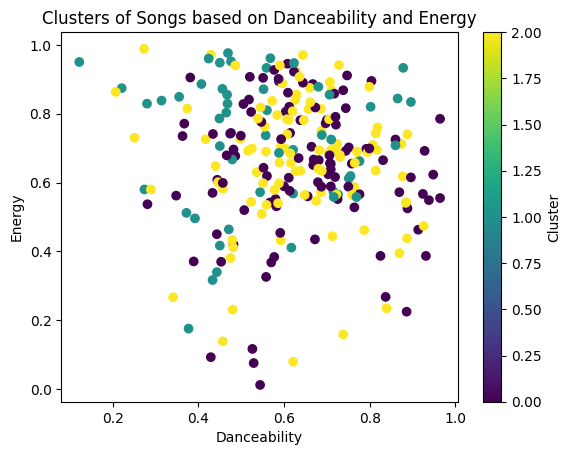

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Read the datasets
df1 = pd.read_csv('/content/dataset.csv')
df2 = pd.read_csv('/content/278k_labelled_uri.csv')

# Slice the dataframes to include only the first 259 rows
df1_subset = df1.iloc[:259]
df2_subset = df2.iloc[:259]

# Concatenate the dataframes along columns
combined_df = pd.concat([df1_subset, df2_subset], axis=1)

# Now, combined_df contains both datasets with the first 259 rows from each
# Let's assume combined_df has columns 'danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
# 'instrumentalness', 'liveness', 'valence', and 'tempo'

# Define features (X)
X = combined_df[['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']]

# Perform KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)
labels = kmeans.labels_

# Add the cluster labels to the dataframe
combined_df['cluster'] = labels

# Plot the clusters in 2D for visualization (you may need to adjust based on the number of features)
plt.scatter(combined_df['danceability'], combined_df['energy'], c=combined_df['cluster'], cmap='viridis')
plt.xlabel('Danceability')
plt.ylabel('Energy')
plt.title('Clusters of Songs based on Danceability and Energy')
plt.colorbar(label='Cluster')
plt.show()


In [ ]:
import pandas as pd
from sklearn.cluster import KMeans

# Read the dataset containing song features
songs_df = pd.read_csv('/content/combined_dataset.csv')

# Select the features for clustering (e.g., danceability and energy)
X = songs_df[['danceability', 'energy']]

# Perform K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)
labels = kmeans.labels_

# Add the cluster labels to the dataframe
songs_df['cluster'] = labels

# Create playlists based on clusters
for cluster_id in range(kmeans.n_clusters):
    cluster_songs = songs_df[songs_df['cluster'] == cluster_id]
    playlist_name = f"Playlist {cluster_id + 1}"  # Name the playlist based on the cluster ID
    cluster_songs.to_csv(f"{playlist_name}.csv", index=False)  # Save the playlist as a CSV file

    print(f"Playlist {cluster_id + 1} created with {len(cluster_songs)} songs.")


Playlist 1 created with 100 songs.
Playlist 2 created with 54 songs.
Playlist 3 created with 106 songs.


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
import pandas as pd

# Read the playlists from CSV files and store them in a list
playlist_files = ['/content/Playlist 1.csv', '/content/Playlist 2.csv', '/content/Playlist 3.csv']
playlists = [pd.read_csv(file) for file in playlist_files]

# Concatenate the playlists into a single DataFrame
all_songs_df = pd.concat(playlists)

# Display the combined playlist in tabular form
print(all_songs_df)


                                             Song Name        End Time  \
0    Janiye (from the Netflix Film "Chor Nikal Ke B...  25/12/23 18:52   
1                                             Dil Leke  25/12/23 18:57   
2                       Taal Se Taal - Western Version  25/12/23 18:58   
3                                 Tumhe Apna Banane Ka  25/12/23 19:07   
4                                         Jeene Bhi De  25/12/23 19:11   
..                                                 ...             ...   
101  Janiye (from the Netflix Film "Chor Nikal Ke B...  01/01/24 13:54   
102                                            Baarish  01/01/24 13:54   
103                           Saat Samundar Paar Happy  01/01/24 13:58   
104                                            Sharara  01/01/24 14:01   
105                            Teri Aakhya Ka Yo Kajal  01/01/24 14:06   

          Artist Name  Unnamed: 0.1  Unnamed: 0  duration (ms)  danceability  \
0       Vishal Mishra          

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


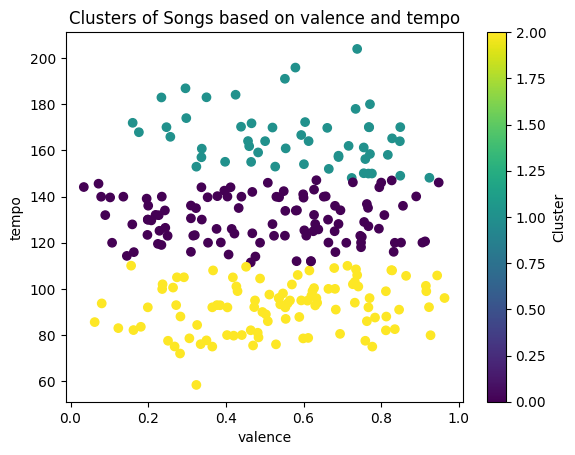

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Read the datasets
df1 = pd.read_csv('/content/dataset.csv')
df2 = pd.read_csv('/content/278k_labelled_uri.csv')

# Slice the dataframes to include only the first 259 rows
df1_subset = df1.iloc[:259]
df2_subset = df2.iloc[:259]

# Concatenate the dataframes along columns
combined_df = pd.concat([df1_subset, df2_subset], axis=1)

# Now, combined_df contains both datasets with the first 259 rows from each
# Let's assume combined_df has columns 'danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
# 'instrumentalness', 'liveness', 'valence', and 'tempo'

# Define features (X)
X = combined_df[['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']]

# Perform KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)
labels = kmeans.labels_

# Add the cluster labels to the dataframe
combined_df['cluster'] = labels

# Plot the clusters in 2D for visualization (you may need to adjust based on the number of features)
plt.scatter(combined_df['valence'], combined_df['tempo'], c=combined_df['cluster'], cmap='viridis')
plt.xlabel('valence')
plt.ylabel('tempo')
plt.title('Clusters of Songs based on valence and tempo')
plt.colorbar(label='Cluster')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


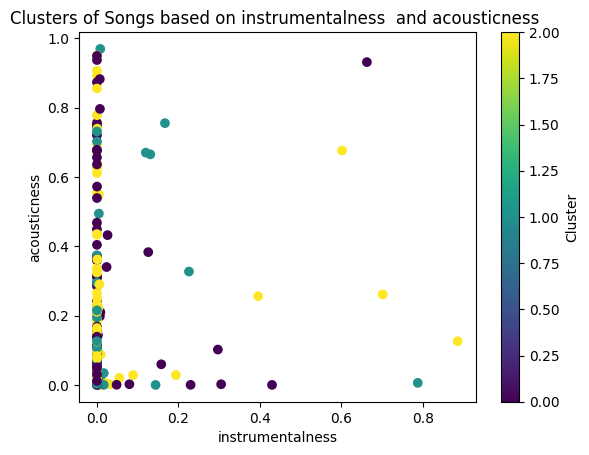

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Read the datasets
df1 = pd.read_csv('/content/dataset.csv')
df2 = pd.read_csv('/content/278k_labelled_uri.csv')

# Slice the dataframes to include only the first 259 rows
df1_subset = df1.iloc[:259]
df2_subset = df2.iloc[:259]

# Concatenate the dataframes along columns
combined_df = pd.concat([df1_subset, df2_subset], axis=1)

# Now, combined_df contains both datasets with the first 259 rows from each
# Let's assume combined_df has columns 'danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
# 'instrumentalness', 'liveness', 'valence', and 'tempo'

# Define features (X)
X = combined_df[['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']]

# Perform KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)
labels = kmeans.labels_

# Add the cluster labels to the dataframe
combined_df['cluster'] = labels

# Plot the clusters in 2D for visualization (you may need to adjust based on the number of features)
plt.scatter(combined_df['instrumentalness'], combined_df['acousticness'], c=combined_df['cluster'], cmap='viridis')
plt.xlabel('instrumentalness')
plt.ylabel('acousticness')
plt.title('Clusters of Songs based on instrumentalness  and acousticness ')
plt.colorbar(label='Cluster')
plt.show()
